In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
#basic url

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)




625

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nakamura
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | anloga
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | vanimo
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | tiznit
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | bambey
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | marsh harbour
Processing Record 22 of Set 1 | lompoc
Processing Record 23 of Set 1 | prince rupert
Processing Reco

Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | la peca
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | altagracia de orituco
Processing Record 46 of Set 4 | mwinilunga
Processing Record 47 of Set 4 | sirohi
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | sunndalsora
Processing Record 50 of Set 4 | cayenne
Processing Record 1 of Set 5 | ostrovnoy
Processing Record 2 of Set 5 | talara
Processing Record 3 of Set 5 | lexington park
Processing Record 4 of Set 5 | khasan
Processing Record 5 of Set 5 | nam tha
City not found. Skipping...
Processing Record 6 of Set 5 | hobyo
Processing Record 7 of Set 5 | luanda
Processing Record 8 of Set 5 | plettenberg bay
Processing Record 9 of Set 5 | develi
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11 of 

Processing Record 25 of Set 8 | umm kaddadah
Processing Record 26 of Set 8 | komsomolskiy
Processing Record 27 of Set 8 | temaraia
City not found. Skipping...
Processing Record 28 of Set 8 | ketchikan
Processing Record 29 of Set 8 | klyuchi
Processing Record 30 of Set 8 | ouadda
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | gornopravdinsk
Processing Record 33 of Set 8 | manicore
Processing Record 34 of Set 8 | lishui
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | boralday
Processing Record 37 of Set 8 | barra patuca
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | carutapera
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | santa margherita ligure
Processing Record 42 of Set 8 | high rock
Processing Record 43 of Set 8 | vila
Processing Record 44 of Set 8 | yuancheng
Processing Record 45 of Set 8 | aksarka
Processing Record 46 of Set 8 | ampanihy
Processing Record

Processing Record 14 of Set 12 | kushmurun
Processing Record 15 of Set 12 | nago
Processing Record 16 of Set 12 | black river
Processing Record 17 of Set 12 | ilhabela
Processing Record 18 of Set 12 | jalu
Processing Record 19 of Set 12 | vokhtoga
Processing Record 20 of Set 12 | tromso
Processing Record 21 of Set 12 | buala
Processing Record 22 of Set 12 | erzin
Processing Record 23 of Set 12 | porto novo
Processing Record 24 of Set 12 | yangambi
Processing Record 25 of Set 12 | baykit
Processing Record 26 of Set 12 | weston
Processing Record 27 of Set 12 | naftah
City not found. Skipping...
Processing Record 28 of Set 12 | goroka
Processing Record 29 of Set 12 | alofi
Processing Record 30 of Set 12 | clyde river
Processing Record 31 of Set 12 | dharchula
Processing Record 32 of Set 12 | pontal do parana
Processing Record 33 of Set 12 | uruzgan
Processing Record 34 of Set 12 | kungurtug
Processing Record 35 of Set 12 | sola
Processing Record 36 of Set 12 | araouane
Processing Record 3

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nakamura,32.9833,132.9333,39.34,53,95,2.64,JP,2022-02-07 16:16:49
1,Khatanga,71.9667,102.5000,-18.92,97,100,10.49,RU,2022-02-07 16:13:37
2,Vaini,-21.2000,-175.2000,75.36,100,100,8.05,TO,2022-02-07 16:16:50
3,Mataura,-46.1927,168.8643,45.48,99,12,1.68,NZ,2022-02-07 16:16:50
4,Anloga,5.7947,0.8973,83.16,71,100,14.05,GH,2022-02-07 16:16:51
5,Kapaa,22.0752,-159.3190,71.11,73,21,1.01,US,2022-02-07 16:16:21
6,Vanimo,-2.6741,141.3028,78.13,83,99,0.81,PG,2022-02-07 16:16:51
7,Kahului,20.8947,-156.4700,72.84,81,5,7.00,US,2022-02-07 16:12:22
8,Busselton,-33.6500,115.3333,59.09,75,93,6.55,AU,2022-02-07 16:16:51
9,Broome,42.2506,-75.8330,36.66,66,0,8.05,US,2022-02-07 16:16:52


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

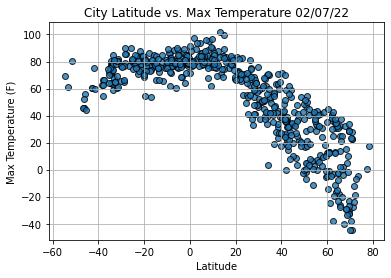

In [17]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

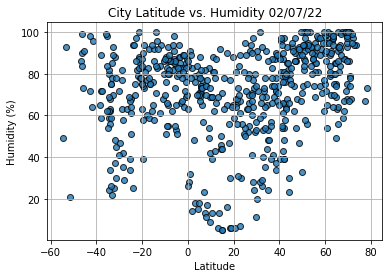

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

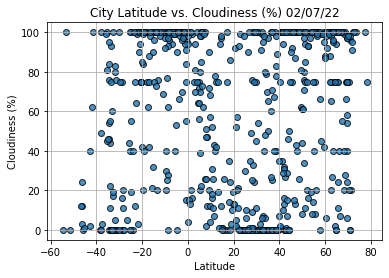

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

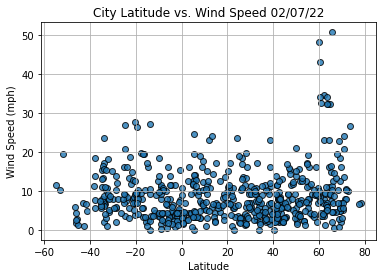

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nakamura,32.9833,132.9333,39.34,53,95,2.64,JP,2022-02-07 16:16:49
1,Khatanga,71.9667,102.5000,-18.92,97,100,10.49,RU,2022-02-07 16:13:37
4,Anloga,5.7947,0.8973,83.16,71,100,14.05,GH,2022-02-07 16:16:51
5,Kapaa,22.0752,-159.3190,71.11,73,21,1.01,US,2022-02-07 16:16:21
7,Kahului,20.8947,-156.4700,72.84,81,5,7.00,US,2022-02-07 16:12:22


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

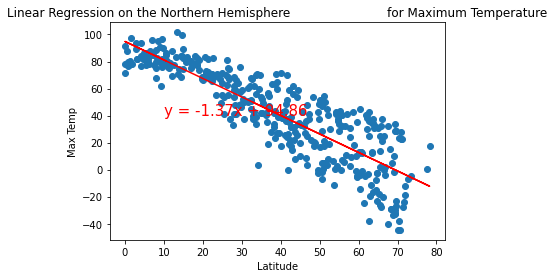

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

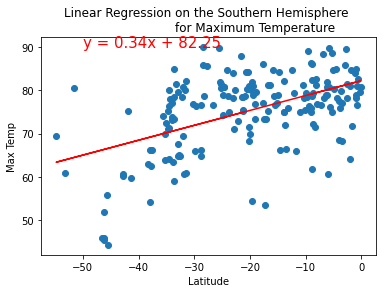

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

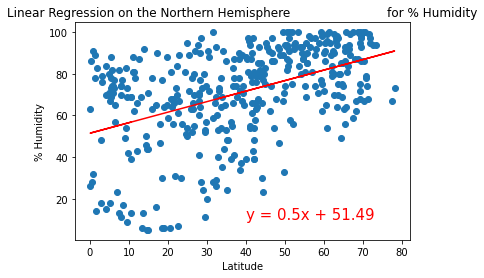

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

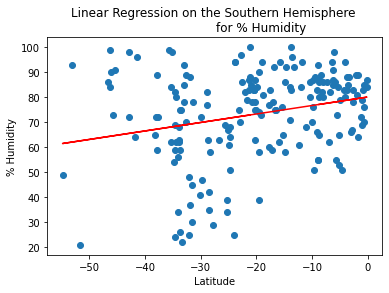

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))